# 2021년도 1월~5월 범죄 신고 데이터 분석

## data set 준비

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/pc/Project_police/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]

In [3]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000

In [4]:
df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_csv(path + i, header=None)
    df = pd.concat([df, data])

df = df.reset_index(drop=True)  # 인덱스 재배열 하는 함수

df.columns = ['접수년월', '경찰서명', '신고 건수(전체)', '신고 성별(남자)', '신고 성별(여자)', '신고 성별(불상)', '신고 성별(기타)',
              '접수긴급유형(긴급)', '접수긴급유형(중요)', '접수긴급유형(일반)', '접수긴급유형(민원)', '접수긴급유형(기타)', '발생요일(일)',
              '발생요일(월)', '발생요일(화)', '발생요일(수)', '발생요일(목)', '발생요일(금)', '발생요일(토)', '발생시간대(00)',
              '발생시간대(01)', '발생시간대(02)', '발생시간대(03)', '발생시간대(04)', '발생시간대(05)', '발생시간대(06)', '발생시간대(07)',
              '발생시간대(08)', '발생시간대(09)', '발생시간대(10)', '발생시간대(11)', '발생시간대(12)', '발생시간대(13)', '발생시간대(14)',
              '발생시간대(15)', '발생시간대(16)', '발생시간대(17)', '발생시간대(18)', '발생시간대(19)', '발생시간대(20)', '발생시간대(21)',
              '발생시간대(22)', '발생시간대(23)']
df.head()

,접수년월,경찰서명,신고 건수(전체),신고 성별(남자),신고 성별(여자),신고 성별(불상),신고 성별(기타),접수긴급유형(긴급),접수긴급유형(중요),접수긴급유형(일반),접수긴급유형(민원),접수긴급유형(기타),발생요일(일),발생요일(월),발생요일(화),발생요일(수),발생요일(목),발생요일(금),발생요일(토),발생시간대(00),발생시간대(01),발생시간대(02),발생시간대(03),발생시간대(04),발생시간대(05),발생시간대(06),발생시간대(07),발생시간대(08),발생시간대(09),발생시간대(10),발생시간대(11),발생시간대(12),발생시간대(13),발생시간대(14),발생시간대(15),발생시간대(16),발생시간대(17),발생시간대(18),발생시간대(19),발생시간대(20),발생시간대(21),발생시간대(22),발생시간대(23)
0,202101,ETC,520268,171391,100200,242144,6533,491,12007,24063,3513,480194,73026,69212,66571,69566,69276,88277,84340,18253,13879,11319,8987,7144,7019,8390,10275,14269,19939,24177,25551,26834,28739,29678,29821,30632,30101,30144,30178,29842,34991,27875,22231
1,202101,가평,941,511,226,204,0,10,233,482,79,137,141,128,112,119,122,164,155,36,23,20,12,4,7,9,21,26,46,42,58,57,55,67,50,63,41,52,67,44,55,56,30
2,202101,강릉,3592,1634,941,1017,0,6,662,1703,292,929,499,476,449,437,476,565,690,120,109,72,76,57,52,47,76,83,107,140,167,164,166,190,199,214,207,205,214,239,344,197,147
3,202101,강원청,94,46,28,20,0,4,76,11,3,0,10,16,12,13,13,13,17,3,8,3,1,2,1,0,1,2,12,3,4,5,6,3,6,5,9,5,1,4,3,3,4
4,202101,강진,412,213,121,78,0,2,109,221,34,46,60,48,46,58,64,83,53,21,6,8,7,5,4,2,5,11,14,16,32,25,22,27,27,32,28,25,23,23,18,17,14


In [5]:
index_name = df[df.경찰서명 == 'ETC'].index

In [6]:
df.drop(index=index_name, axis=0, inplace=True)
df.head()

,접수년월,경찰서명,신고 건수(전체),신고 성별(남자),신고 성별(여자),신고 성별(불상),신고 성별(기타),접수긴급유형(긴급),접수긴급유형(중요),접수긴급유형(일반),접수긴급유형(민원),접수긴급유형(기타),발생요일(일),발생요일(월),발생요일(화),발생요일(수),발생요일(목),발생요일(금),발생요일(토),발생시간대(00),발생시간대(01),발생시간대(02),발생시간대(03),발생시간대(04),발생시간대(05),발생시간대(06),발생시간대(07),발생시간대(08),발생시간대(09),발생시간대(10),발생시간대(11),발생시간대(12),발생시간대(13),발생시간대(14),발생시간대(15),발생시간대(16),발생시간대(17),발생시간대(18),발생시간대(19),발생시간대(20),발생시간대(21),발생시간대(22),발생시간대(23)
1,202101,가평,941,511,226,204,0,10,233,482,79,137,141,128,112,119,122,164,155,36,23,20,12,4,7,9,21,26,46,42,58,57,55,67,50,63,41,52,67,44,55,56,30
2,202101,강릉,3592,1634,941,1017,0,6,662,1703,292,929,499,476,449,437,476,565,690,120,109,72,76,57,52,47,76,83,107,140,167,164,166,190,199,214,207,205,214,239,344,197,147
3,202101,강원청,94,46,28,20,0,4,76,11,3,0,10,16,12,13,13,13,17,3,8,3,1,2,1,0,1,2,12,3,4,5,6,3,6,5,9,5,1,4,3,3,4
4,202101,강진,412,213,121,78,0,2,109,221,34,46,60,48,46,58,64,83,53,21,6,8,7,5,4,2,5,11,14,16,32,25,22,27,27,32,28,25,23,23,18,17,14
5,202101,거제,3019,1639,962,418,0,42,471,1722,461,323,406,380,362,428,407,559,477,107,89,61,32,31,22,41,62,68,93,108,117,118,168,165,181,199,179,169,189,189,264,227,140


## EDA 및 기초통계 분석

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 1 to 1367
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   접수년월        1363 non-null   int64 
 1   경찰서명        1363 non-null   object
 2   신고 건수(전체)   1363 non-null   int64 
 3   신고 성별(남자)   1363 non-null   int64 
 4   신고 성별(여자)   1363 non-null   int64 
 5   신고 성별(불상)   1363 non-null   int64 
 6   신고 성별(기타)   1363 non-null   int64 
 7   접수긴급유형(긴급)  1363 non-null   int64 
 8   접수긴급유형(중요)  1363 non-null   int64 
 9   접수긴급유형(일반)  1363 non-null   int64 
 10  접수긴급유형(민원)  1363 non-null   int64 
 11  접수긴급유형(기타)  1363 non-null   int64 
 12  발생요일(일)     1363 non-null   int64 
 13  발생요일(월)     1363 non-null   int64 
 14  발생요일(화)     1363 non-null   int64 
 15  발생요일(수)     1363 non-null   int64 
 16  발생요일(목)     1363 non-null   int64 
 17  발생요일(금)     1363 non-null   int64 
 18  발생요일(토)     1363 non-null   int64 
 19  발생시간대(00)   1363 non-null   int64 
 20  발생시간대(01

In [8]:
df.describe()

,접수년월,신고 건수(전체),신고 성별(남자),신고 성별(여자),신고 성별(불상),신고 성별(기타),접수긴급유형(긴급),접수긴급유형(중요),접수긴급유형(일반),접수긴급유형(민원),접수긴급유형(기타),발생요일(일),발생요일(월),발생요일(화),발생요일(수),발생요일(목),발생요일(금),발생요일(토),발생시간대(00),발생시간대(01),발생시간대(02),발생시간대(03),발생시간대(04),발생시간대(05),발생시간대(06),발생시간대(07),발생시간대(08),발생시간대(09),발생시간대(10),발생시간대(11),발생시간대(12),발생시간대(13),발생시간대(14),발생시간대(15),발생시간대(16),발생시간대(17),발생시간대(18),발생시간대(19),발생시간대(20),발생시간대(21),발생시간대(22),발생시간대(23)
count,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000
mean,202102.999266,3226.038885,1664.299340,918.834923,642.900954,0.003668,22.235510,642.329420,1758.181218,336.396185,466.896552,437.513573,454.128393,432.064563,450.473955,446.804109,493.991930,511.062362,156.470286,118.721937,87.510638,62.982392,46.574468,39.414527,42.974321,56.672781,83.076302,110.799707,131.314013,135.000000,137.340426,154.124725,165.344094,169.968452,172.518709,174.136464,175.536317,172.601614,178.669112,213.267058,245.146001,195.874541
std,1.414473,2689.931553,1410.105411,787.452114,535.529288,0.060478,23.004268,557.746215,1520.871560,307.158676,433.741356,366.158532,384.663207,364.600864,381.637759,383.509739,420.482969,431.439145,148.402016,111.706959,83.752172,60.864390,45.730257,37.983987,37.186517,46.099984,67.725823,87.698088,103.659202,107.446117,110.295412,122.443222,129.973542,134.891096,136.876576,139.591529,143.314132,143.348642,151.602167,190.694381,244.652920,191.996240
min,202101.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202102.000000,733.500000,380.000000,195.000000,162.000000,0.000000,3.000000,161.000000,361.000000,76.500000,102.000000,102.500000,103.000000,99.500000,104.000000,102.500000,113.500000,112.500000,26.000000,19.000000,13.000000,10.000000,7.000000,7.000000,11.000000,17.000000,24.000000,33.000000,38.000000,39.000000,37.000000,40.000000,45.000000,46.000000,46.500000,45.000000,42.000000,41.000000,40.000000,40.000000,40.500000,30.000000
50%,202103.000000,2832.000000,1421.000000,762.000000,537.000000,0.000000,14.000000,501.000000,1486.000000,248.000000,395.000000,374.000000,383.000000,371.000000,383.000000,379.000000,421.000000,435.000000,123.000000,93.000000,69.000000,47.000000,35.000000,30.000000,35.000000,49.000000,70.000000,96.000000,116.000000,120.000000,122.000000,138.000000,147.000000,148.000000,152.000000,156.000000,153.000000,152.000000,156.000000,176.000000,190.000000,153.000000
75%,202104.000000,4989.500000,2569.000000,1426.000000,986.500000,0.000000,34.000000,935.000000,2788.000000,527.000000,713.000000,673.000000,707.500000,674.500000,689.500000,688.000000,765.500000,789.000000,245.500000,187.000000,140.500000,99.500000,75.000000,61.000000,67.000000,85.000000,126.000000,168.000000,202.000000,205.000000,210.000000,233.000000,255.000000,259.000000,263.500000,270.000000,272.000000,265.500000,281.000000,336.000000,362.000000,294.000000
max,202105.000000,12564.000000,6383.000000,3552.000000,4955.000000,1.000000,114.000000,2923.000000,7549.000000,1478.000000,5102.000000,1801.000000,1931.000000,1816.000000,1900.000000,2062.000000,2148.000000,2214.000000,802.000000,553.000000,433.000000,358.000000,299.000000,227.000000,202.000000,275.000000,429.000000,463.000000,539.000000,560.000000,570.000000,637.000000,612.000000,590.000000,678.000000,675.00000

In [9]:
df.columns

Index(['접수년월', '경찰서명', '신고 건수(전체)', '신고 성별(남자)', '신고 성별(여자)', '신고 성별(불상)',
       '신고 성별(기타)', '접수긴급유형(긴급)', '접수긴급유형(중요)', '접수긴급유형(일반)', '접수긴급유형(민원)',
       '접수긴급유형(기타)', '발생요일(일)', '발생요일(월)', '발생요일(화)', '발생요일(수)', '발생요일(목)',
       '발생요일(금)', '발생요일(토)', '발생시간대(00)', '발생시간대(01)', '발생시간대(02)',
       '발생시간대(03)', '발생시간대(04)', '발생시간대(05)', '발생시간대(06)', '발생시간대(07)',
       '발생시간대(08)', '발생시간대(09)', '발생시간대(10)', '발생시간대(11)', '발생시간대(12)',
       '발생시간대(13)', '발생시간대(14)', '발생시간대(15)', '발생시간대(16)', '발생시간대(17)',
       '발생시간대(18)', '발생시간대(19)', '발생시간대(20)', '발생시간대(21)', '발생시간대(22)',
       '발생시간대(23)'],
      dtype='object')

In [10]:
df['경찰서명'].unique()

array(['가평', '강릉', '강원청', '강진', '거제', '거창', '경기남부청', '경기북부청', '경남청',
       '경북청', '경비교통과', '경산', '경주', '경찰청', '고령', '고성', '고양', '고창', '고흥',
       '곡성', '공주', '과천', '광명', '광양', '광주', '광주광산', '광주남부', '광주동부', '광주북부',
       '광주서부', '광주청', '괴산', '교통과', '구례', '구리', '구미', '군산', '군위', '군포',
       '금산', '김제', '김천', '김포', '김해서부', '김해중부', '나주', '남원', '남해', '논산',
       '단양', '담양', '당진', '대구강북', '대구남부', '대구달서', '대구달성', '대구동부', '대구북부',
       '대구서부', '대구성서', '대구수성', '대구중부', '대구청', '대전대덕', '대전동부', '대전둔산',
       '대전서부', '대전유성', '대전중부', '대전청', '동두천', '동해', '마산동부', '마산중부', '목포',
       '무안', '무주', '문경', '밀양', '보령', '보성', '보은', '봉화', '부산강서', '부산금정',
       '부산기장', '부산남부', '부산동래', '부산동부', '부산북부', '부산사상', '부산사하', '부산서부',
       '부산연제', '부산영도', '부산중부', '부산진', '부산청', '부산해운대', '부안', '부여', '부천소사',
       '부천오정', '부천원미', '분당', '사천', '산청', '삼척', '상주', '서귀포', '서산', '서울강남',
       '서울강동', '서울강북', '서울강서', '서울관악', '서울광진', '서울구로', '서울금천', '서울남대문',
       '서울노원', '서울도봉', '서울동대문', '서울동작', '서울마포', '서울방배', '서울서대문',

## 서울 지역

In [11]:
df_seoul = df[df['경찰서명'].str.contains('서울')] ## df[조건식]

In [12]:
df_seoul.head()

,접수년월,경찰서명,신고 건수(전체),신고 성별(남자),신고 성별(여자),신고 성별(불상),신고 성별(기타),접수긴급유형(긴급),접수긴급유형(중요),접수긴급유형(일반),접수긴급유형(민원),접수긴급유형(기타),발생요일(일),발생요일(월),발생요일(화),발생요일(수),발생요일(목),발생요일(금),발생요일(토),발생시간대(00),발생시간대(01),발생시간대(02),발생시간대(03),발생시간대(04),발생시간대(05),발생시간대(06),발생시간대(07),발생시간대(08),발생시간대(09),발생시간대(10),발생시간대(11),발생시간대(12),발생시간대(13),발생시간대(14),발생시간대(15),발생시간대(16),발생시간대(17),발생시간대(18),발생시간대(19),발생시간대(20),발생시간대(21),발생시간대(22),발생시간대(23)
112,202101,서울강남,9105,4671,2315,2119,0,56,1823,5345,899,982,1081,1068,1235,1606,1254,1458,1403,471,351,243,230,175,195,154,203,202,308,318,328,312,359,379,419,428,434,486,491,587,844,682,506
113,202101,서울강동,6212,3179,1807,1226,0,46,1499,3452,493,722,889,809,739,835,907,995,1038,270,213,143,109,126,94,86,71,136,169,186,253,237,243,310,346,344,272,335,359,427,650,466,367
114,202101,서울강북,5217,2400,1737,1080,0,31,1242,2698,369,877,815,766,585,634,637,855,925,244,174,146,112,80,68,100,77,102,151,184,177,210,241,261,244,304,300,272,296,321,507,381,265
115,202101,서울강서,8716,4233,2621,1862,0,57,2017,4603,815,1224,1299,1006,1026,1179,1041,1647,1518,484,334,244,183,141,122,132,124,179,254,333,311,344,410,395,428,410,400,500,450,561,884,623,470
116,202101,서울관악,7975,4037,2182,1756,0,53,1918,4532,704,768,1172,956,954,1185,1000,1291,1417,417,367,261,182,195,119,107,118,123,210,221,273,298,355,332,361,370,389,423,490,524,743,636,461


In [13]:
df_seoul = df_seoul.reset_index(drop = True)
df_seoul

,접수년월,경찰서명,신고 건수(전체),신고 성별(남자),신고 성별(여자),신고 성별(불상),신고 성별(기타),접수긴급유형(긴급),접수긴급유형(중요),접수긴급유형(일반),접수긴급유형(민원),접수긴급유형(기타),발생요일(일),발생요일(월),발생요일(화),발생요일(수),발생요일(목),발생요일(금),발생요일(토),발생시간대(00),발생시간대(01),발생시간대(02),발생시간대(03),발생시간대(04),발생시간대(05),발생시간대(06),발생시간대(07),발생시간대(08),발생시간대(09),발생시간대(10),발생시간대(11),발생시간대(12),발생시간대(13),발생시간대(14),발생시간대(15),발생시간대(16),발생시간대(17),발생시간대(18),발생시간대(19),발생시간대(20),발생시간대(21),발생시간대(22),발생시간대(23)
0,202101,서울강남,9105,4671,2315,2119,0,56,1823,5345,899,982,1081,1068,1235,1606,1254,1458,1403,471,351,243,230,175,195,154,203,202,308,318,328,312,359,379,419,428,434,486,491,587,844,682,506
1,202101,서울강동,6212,3179,1807,1226,0,46,1499,3452,493,722,889,809,739,835,907,995,1038,270,213,143,109,126,94,86,71,136,169,186,253,237,243,310,346,344,272,335,359,427,650,466,367
2,202101,서울강북,5217,2400,1737,1080,0,31,1242,2698,369,877,815,766,585,634,637,855,925,244,174,146,112,80,68,100,77,102,151,184,177,210,241,261,244,304,300,272,296,321,507,381,265
3,202101,서울강서,8716,4233,2621,1862,0,57,2017,4603,815,1224,1299,1006,1026,1179,1041,1647,1518,484,334,244,183,141,122,132,124,179,254,333,311,344,410,395,428,410,400,500,450,561,884,623,470
4,202101,서울관악,7975,4037,2182,1756,0,53,1918,4532,704,768,1172,956,954,1185,1000,1291,1417,417,367,261,182,195,119,107,118,123,210,221,273,298,355,332,361,370,389,423,490,524,743,636,461
5,202101,서울광진,6207,3060,1821,1326,0,48,1531,3507,458,663,992,758,781,786,763,993,1134,340,261,178,106,86,72,85,119,140,147,189,202,185,239,266,283,305,289,331,383,397,730,533,341
6,202101,서울구로,6568,3457,1946,1165,0,63,1532,3556,506,911,893,819,879,917,853,1131,1076,251,200,118,80,74,81,80,88,150,189,228,277,294,329,356,362,326,357,400,456,455,587,469,361
7,202101,서울금천,5099,2786,1431,882,0,37,1251,2767,458,586,785,584,669,777,688,785,811,235,157,112,102,64,49,92,69,103,141,186,198,191,229,269,237,253,243,327,355,364,500,345,278
8,202101,서울남대문,1623,901,394,328,0,17,333,969,124,180,189,205,190,270,229,299,241,48,26,18,13,16,17,17,35,46,70,72,90,82,118,101,91,109,78,118,102,91,126,89,50
9,202101,서울노원,6619,3312,1901,1406,0,71,1739,3502,560,747,1078,838,795,946,731,1054,1177,325,210,165,94,69,67,67,95,133,209,266,252,283,331,292,341,373,391,383,405,427,607,494,340


## 21년 1월 서울 경찰서 요일별 신고량 분석

In [14]:
df_seoul_date = df_seoul.iloc[0:32,[12,13,14,15,16,17,18]]
df_seoul_date

,발생요일(일),발생요일(월),발생요일(화),발생요일(수),발생요일(목),발생요일(금),발생요일(토)
0,1081,1068,1235,1606,1254,1458,1403
1,889,809,739,835,907,995,1038
2,815,766,585,634,637,855,925
3,1299,1006,1026,1179,1041,1647,1518
4,1172,956,954,1185,1000,1291,1417
5,992,758,781,786,763,993,1134
6,893,819,879,917,853,1131,1076
7,785,584,669,777,688,785,811
8,189,205,190,270,229,299,241
9,1078,838,795,946,731,1054,1177


In [15]:
df_seoul_date.index = df_seoul[0:32].경찰서명

In [16]:
df_seoul_date

,발생요일(일),발생요일(월),발생요일(화),발생요일(수),발생요일(목),발생요일(금),발생요일(토)
경찰서명,,,,,,,
서울강남,1081,1068,1235,1606,1254,1458,1403
서울강동,889,809,739,835,907,995,1038
서울강북,815,766,585,634,637,855,925
서울강서,1299,1006,1026,1179,1041,1647,1518
서울관악,1172,956,954,1185,1000,1291,1417
서울광진,992,758,781,786,763,993,1134
서울구로,893,819,879,917,853,1131,1076
서울금천,785,584,669,777,688,785,811
서울남대문,189,205,190,270,229,299,241


In [21]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

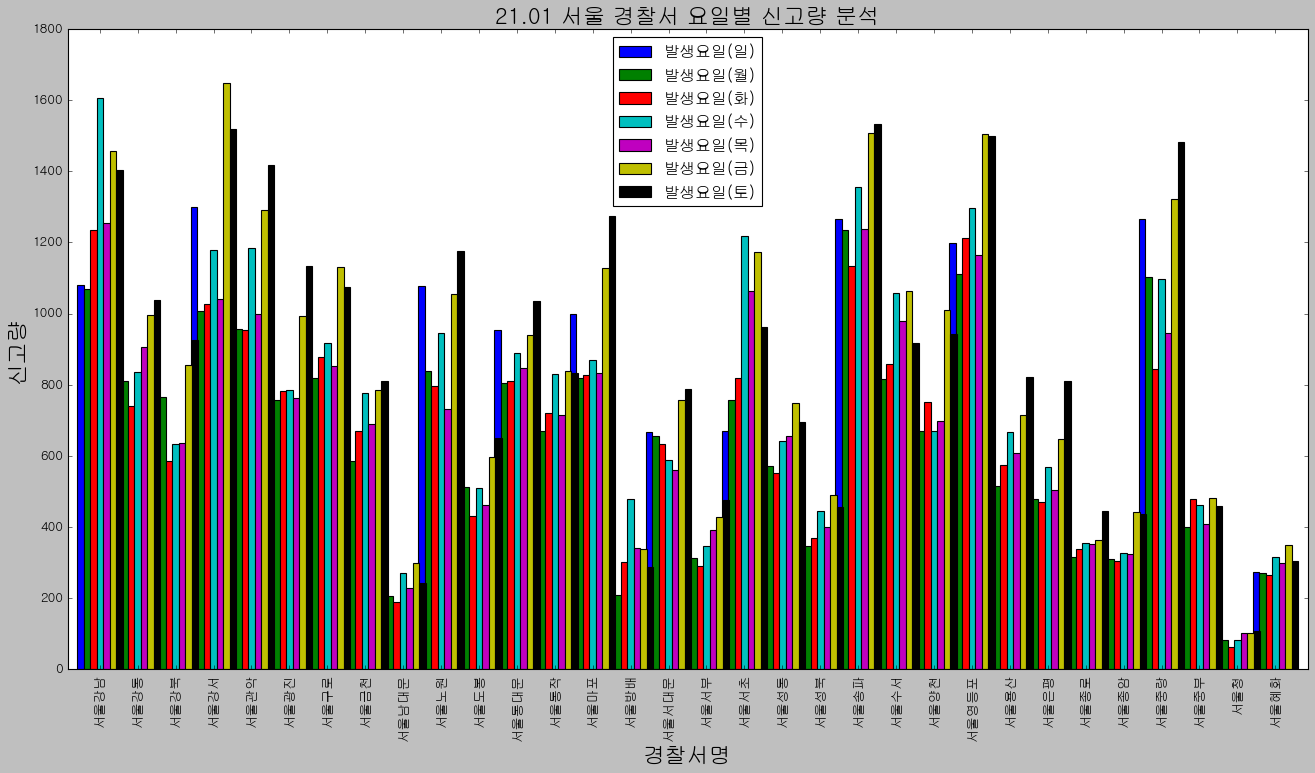

In [22]:
#plt.style.use('classic')
df_seoul_date.plot(kind='bar', figsize=(20, 10), width=1.2)
plt.title('21.01 서울 경찰서 요일별 신고량 분석', size=20)
plt.ylabel('신고량', size=20)
plt.xlabel('경찰서명', size=20)
plt.show()